# 2. Tipos de dados, marcas gráficas e canais de codificação visual
---

Uma visualização representa dados a partir de uma variedade de marcas gráficas (barras, linhas, pontos, etc.). Os atributos de uma marca - como sua posição, forma, tamanho ou cor - servem como canal através do qual se pode expressar as entrelinhas subjacentes a informação.

Com um framework (ou estrutura) básico de tipos de dados, marcas e canais de codificação é possível criar com concisão uma vasta gama de visualizações. Neste capítulo, exploramos cada um desses elementos e mostramos como usá-los para customizar gráficos estatísticos.

*Este capítulo faz parte do [currículo de visualização de dados.](https://github.com/uwdata/visualization-curriculum)*

In [1]:
import pandas as pd
import altair as alt

## 2.1 Desenvolvimento Global de Dados
---

Visualizaremos dados sobre saúde e população global pelo período de 1995 a 2005. Essas informações foram colhidas pela [Gapminder Foundation](https://www.google.com/url?q=https%3A%2F%2Fwww.gapminder.org%2F) e compartilhados no popular [TED Talk do Hans Rosling](https://www.youtube.com/watch?v=hVimVzgtD6w). Se você não o conhece, recomendamos que assista primeiro!

Começaremos baixando o conjunto de dados da coleção [vega_datasets](https://github.com/vega/vega-datasets) como um dataframe da extensão Pandas.

In [2]:
from vega_datasets import data as vega_data
data = vega_data.gapminder()

Qual o tamanho desse conjunto de dados?

In [3]:
data.shape

(693, 6)

693 linhas e 6 colunas! Vamos espiar seu conteúdo:

In [4]:
data.head(5)

,year,country,cluster,pop,life_expect,fertility
0,1955,Afghanistan,0,8891209,30.332,7.7
1,1960,Afghanistan,0,9829450,31.997,7.7
2,1965,Afghanistan,0,10997885,34.020,7.7
3,1970,Afghanistan,0,12430623,36.088,7.7
4,1975,Afghanistan,0,14132019,38.438,7.7


Para cada país e data (em intervalos de 5 anos), há parâmetros de fertilidade
em termos de filhos por mulher (fertility), expectativa de vida em anos (life_expect) e população total (pop).

Também observamos um campo de cluster com um código inteiro. O que isso pode representar? Vamos tentar resolver esse mistério visualizando os dados!

Vamos também criar um DataFrame menor, filtrado apenas para os valores do ano 2000:

In [7]:
data2000 = data.loc[data['year'] == 2000]

In [8]:
data2000.head(5)

,year,country,cluster,pop,life_expect,fertility
9,2000,Afghanistan,0,23898198,42.129,7.4792
20,2000,Argentina,3,37497728,74.340,2.3500
31,2000,Aruba,3,69539,73.451,2.1240
42,2000,Australia,4,19164620,80.370,1.7560
53,2000,Austria,1,8113413,78.980,1.3820


## 2.2 Tipos de dados
---
O primeiro ingrediente para fazermos uma visualização efetiva são os dados de entrada. Os valores que recebemos podem representar diferentes formas de medida. Que tipo de comparações essas medições suportam? E que tipos de codificações suportam essas comparações?

Vamos começar olhando pelos tipos de dados básicos que o Altair usa para informar as escolhas de codificações visuais. Esses tipos vão determinar quais comparações podemos fazer, e ser um guia nas nossas decisões a respeito do design das visualizações.


O primeiro ingrediente na visualização eficaz são os dados de entrada. Os valores dos dados podem representar diferentes formas de medição. Que tipos de comparações essas medições suportam? E que tipos de codificações visuais suportam essas comparações?

Começaremos observando os tipos básicos de dados que o Altair usa para informar as escolhas de codificação visual. Esses tipos de dados determinam os tipos de comparações que podemos fazer e, portanto, orientam nossas decisões de design de visualização.

### 2.2.1 Nominal (N)

Dados *nominais* (também chamados de dados *categóricos*) consistem em nomes de categorias.

Com dados nominais, podemos comparar a igualdade de valores: *o valor A é igual ou diferente do valor B? (A = B)*, apoiando declarações como "A é igual a B" ou "A não é igual a B".
No conjunto de dados acima, o campo `country` (país) é nominal.

Ao visualizar dados nominais, devemos ser capazes de ver prontamente se os valores são iguais ou diferentes: posição, matiz de cor (azul, vermelho, verde, *etc.*) e forma podem ajudar. No entanto, usar um canal de tamanho para codificar dados nominais pode nos enganar, sugerindo diferenças de ordem de classificação ou magnitude entre valores que não existem!

### 2.2.2 Ordinal (O)

Dados *ordinais* consistem em valores que têm uma ordenação específica.

Com dados ordinais, podemos comparar a ordenação de classificação de valores: *o valor A vem antes ou depois do valor B? (A < B)*, apoiando afirmações como "A é menor que B" ou "A é maior que B".
No conjunto de dados acima, podemos tratar o campo `year`(ano) como ordinal.

Ao visualizar dados ordinais, devemos perceber uma sensação de ordem de classificação. Posição, tamanho ou valor de cor (brilho) podem ser apropriados, enquanto matiz de cor (que não é ordenado perceptualmente) seria menos apropriado.

### 2.2.3 Quantitativo (Q)

Com dados *quantitativos*, podemos medir diferenças numéricas entre valores. Existem vários subtipos de dados quantitativos:

Para dados de *intervalo*, podemos medir a distância (intervalo) entre pontos: *qual é a distância do valor A para o valor B? (A - B)*, apoiando afirmações como "A está a 12 unidades de distância de B".

Para dados de *razão*, o ponto zero é significativo e, portanto, também podemos medir proporções ou fatores de escala: *valor A é qual proporção do valor B? (A / B)*, apoiando afirmações como "A é 10% de B" ou "B é 7 vezes maior que A".

No conjunto de dados acima, `year` é um campo de intervalo quantitativo (o valor do ano "zero" é subjetivo), enquanto `fertility` e `life_expect` são campos de razão quantitativa (zero é significativo para calcular proporções).
O Vega-Lite representa dados quantitativos, mas não faz distinção entre os tipos de intervalo e razão.

Os valores quantitativos podem ser visualizados usando posição, tamanho ou valor de cor, entre outros canais. Um eixo com uma linha de base zero é essencial para comparações proporcionais de valores de razão, mas pode ser omitido com segurança para comparações de intervalo.

### 2.2.4 Temporal (T)

Valores *temporais* medem pontos de tempo ou intervalos. Este tipo é um caso especial de valores quantitativos (carimbos de tempo) com semântica e convenções ricas (por exemplo, o [calendário gregoriano](https://en.wikipedia.org/wiki/Gregorian_calendar)). O tipo temporal no Vega-Lite suporta raciocínio sobre unidades de tempo (ano, mês, dia, hora, etc.) e fornece métodos para solicitar intervalos de tempo específicos.

Exemplos de valores temporais incluem sequências de datas como `“2019-01-04”` e `“Jan 04 2019”`, bem como datas e horas padronizadas como o [formato de data e hora ISO](https://en.wikipedia.org/wiki/ISO_8601): `“2019-01-04T17:50:35.643Z”`.

Não há valores temporais em nosso conjunto de dados de desenvolvimento global acima, pois o campo `year` é simplesmente codificado como um inteiro. Para mais detalhes sobre o uso de dados temporais no Altair, consulte a [documentação de Horas e Datas](https://altair-viz.github.io/user_guide/times_and_dates.html).

### 2.2.5 Resumo

Esses tipos de dados não são mutuamente exclusivos, mas formam uma hierarquia: dados ordinais suportam comparações nominais (igualdade), enquanto dados quantitativos suportam comparações ordinais (ordem de classificação).

Além disso, esses tipos de dados _não_ fornecem uma categorização fixa. Só porque um campo de dados é representado usando um número não significa que temos que tratá-lo como um tipo quantitativo! Por exemplo, podemos interpretar um conjunto de idades (10 anos, 20 anos, etc.) como nominal (menor ou maior), ordinal (agrupado por ano) ou quantitativo (calcular idade média).

Agora vamos examinar como codificar visualmente esses tipos de dados!

## 2.3 Canais de Codificação
---

No cerne do Altair está o uso de *codificações* que vinculam campos de dados (com um determinado tipo de dado) a *canais* de codificação disponíveis, de um tipo de marca escolhido. Neste capítulo, examinaremos os seguintes canais de codificação:

* `x`: Posição horizontal (eixo x) da marca.
* `y` : Posição vertical (eixo y) da marca.
* `Size (tamanho)` </span>: Tamanho da marca. Pode corresponder à área ou ao comprimento, dependendo do tipo de marca.
* `Color (cor)`: cor da marca, especificada como uma [cor CSS legal](https://developer.mozilla.org/en-US/docs/Web/CSS/color_value).
* `Opacity (opacidade)`: Marca a opacidade, variando de 0 (totalmente transparente) a 1 (totalmente opaco).
* `Shape (forma)`: Plotando a forma do símbolo para `pontos` </span> da marca.
* `Tooltip (dica de ferramenta)`: Texto da dica de ferramenta a ser exibido ao passar o mouse sobre a marca.
* `Order (ordem)`: Marca a ordem, determina a ordem dos pontos da linha/área e a ordem do desenho.
* `Colunm (coluna)`: Classifica os dados em subparcelas alinhadas horizontalmente.
* `row (linha)`: Classifica os dados em subparcelas alinhadas verticalmente.

Para uma lista completa de canais disponíveis, consulte a [documentação de codificação do Altair.](https://altair-viz.github.io/user_guide/encoding.html)

### 2.3.1 X

O canal de codificação `x` define a posição horizontal de uma marca (coordenada x). Além disso, as escolhas padrões de eixos e títulos são feitas automaticamente. No gráfico abaixo, a escolha de um tipo de dado quantitativo resulta em uma escala de eixo linear contínuo:

In [9]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q')
)

alt.Chart(...)

### 2.3.2 Y

O canal de codificação y define a posição vertical de uma marca (coordenada y). Aqui adicionamos o campo `cluster (agrupamento)` usando um tipo de dados ordinal (O). O resultado é um eixo discreto que inclui uma faixa dimensionada, com um tamanho de passo padrão, para cada valor exclusivo:

In [10]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:O')
)

alt.Chart(...)

*O que acontece com o gráfico acima se você trocar os tipos de campo O e Q?*

Se, em vez disso, adicionarmos o campo `life_expect` como uma variável quantitativa (`Q`), o resultado será um gráfico de dispersão (_scatter plot_) com escalas lineares para ambos os eixos:

In [11]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q')
)

alt.Chart(...)

Por padrão, os eixos das escalas quantitativas lineares incluem zero para garantir uma linha de base adequada para comparar dados com valor de razão. Em alguns casos, entretanto, uma linha de base zero pode não ter sentido ou você queira se concentrar em comparações de intervalo. Para desabilitar a inclusão automática de zero, configure o mapeamento de escala usando o atributo de `scale (escala)` de codificação:

In [12]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q', scale=alt.Scale(zero=False)),
    alt.Y('life_expect:Q', scale=alt.Scale(zero=False))
)

alt.Chart(...)

Agora as escalas dos eixos não incluem mais zero por padrão. Ainda resta algum preenchimento, pois os pontos finais do domínio do eixo são automaticamente ajustados a números agradáveis, como múltiplos de 5 ou 10.

*O que acontece se você também adicionar `nice=False` ao atributo de escala acima?*

### 2.3.3 Tamanho (_size_)

O canal de codificação `size` define o tamanho ou a extensão de uma marca. O significado do canal pode variar com base no tipo de marca. Para marcas `point`, o canal `size` mapeia para a área de pixel do símbolo de plotagem, de modo que o diâmetro do ponto corresponda à raiz quadrada do valor do tamanho.

Vamos aumentar nosso gráfico de dispersão codificando a população (`pop`) no canal `size`. Como resultado, o gráfico agora também inclui uma legenda para interpretar os valores de tamanho.

In [14]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q')
)

alt.Chart(...)

Em alguns casos, podemos ficar insatisfeitos com o intervalo de tamanho padrão. Para fornecer um intervalo personalizado de tamanhos, defina o parâmetro `range` do atributo `scale` para uma matriz indicando os menores e maiores tamanhos. Aqui, atualizamos a codificação de tamanho para variar de 0 pixels (para valores zero) a 1.000 pixels (para o valor máximo no domínio da escala):

In [15]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000]))
)

alt.Chart(...)

### 2.3.4 Cor e opacidade

O canal de codificação `color` define a cor de uma marca. O estilo de codificação de cores é altamente dependente do tipo de dados: dados nominais serão padronizados para um esquema de cores qualitativas multicoloridas, enquanto dados ordinais e quantitativos usarão gradientes de cores ordenados perceptualmente.

Aqui, codificamos o campo `cluster` usando o canal `color` e um tipo de dados nominal (`N`), resultando em um matiz distinto para cada valor de conjunto (_cluster_). Você consegue começar a adivinhar o que o campo `cluster` pode indicar?

In [16]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N')
)

alt.Chart(...)

Se preferirmos formas preenchidas, podemos passar um parâmetro `filled=True` para o método `mark_point`:

In [17]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N')
)

alt.Chart(...)

Por padrão, o Altair usa um pouco de transparência para ajudar a combater o over-plotting. Estamos livres para ajustar ainda mais a opacidade, seja passando um valor padrão para o método `mark_*` ou usando um canal de codificação dedicado.

Aqui demonstramos como fornecer um valor constante para um canal de codificação em vez de vincular um campo de dados:

In [18]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5)
)

alt.Chart(...)

### 2.3.5 Forma (_shape_)
O canal de codificação `shape` define a forma geométrica usada pelas marcas `point`. Ao contrário dos outros canais que vimos até agora, o canal `shape` não pode ser usado por outros tipos de marca. O canal de codificação shape deve ser usado apenas com dados nominais, pois comparações de ordem de classificação e magnitude perceptuais não são suportadas.

Vamos codificar o campo `cluster` usando `shape` e também `color`. Usar vários canais para o mesmo campo de dados subjacente é conhecido como uma *codificação redundante*. O gráfico resultante combina informações de cor e forma em uma única legenda de símbolo:

In [19]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Shape('cluster:N')
)

alt.Chart(...)

### 2.3.6 Dicas de ferramentas e pedidos
A essa altura, você pode se sentir um pouco frustrado: nós construímos um gráfico, mas ainda não sabemos a quais países os pontos visualizados correspondem! Vamos adicionar dicas de ferramentas interativas para permitir a exploração.

O canal de codificação `tooltip` determina o texto da dica de ferramenta a ser exibido quando um usuário move o cursor do mouse sobre uma marca. Vamos adicionar uma codificação de dica de ferramenta para o campo `country` e, em seguida, investigar quais países estão sendo representados.

In [20]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Tooltip('country')
)

alt.Chart(...)

Conforme você passa o mouse, pode perceber que não consegue selecionar alguns pontos. Por exemplo, o maior círculo azul escuro corresponde à Índia, que é desenhado em cima de um país com uma população menor, impedindo que o mouse passe sobre esse país. Para corrigir esse problema, podemos usar o canal de codificação `order`.

O canal de codificação `order` determina a ordem dos pontos de dados, afetando tanto a ordem em que são desenhados quanto, para marcas de `line` e `area`, a ordem em que são conectados uns aos outros.

Vamos ordenar os valores em ordem de classificação decrescente pela população (`pop`), garantindo que círculos menores sejam desenhados depois dos círculos maiores:

In [21]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort='descending')
)

alt.Chart(...)

Agora podemos identificar o país menor que está sendo obscurecido pela Índia: é Bangladesh!

Agora também podemos descobrir o que o campo de agrupamento (`cluster`) representa. Passe o mouse sobre os vários pontos coloridos para formular sua própria explicação.

Neste ponto, adicionamos dicas de ferramentas que mostram apenas uma única propriedade do registro de dados subjacente. Para mostrar vários valores, podemos fornecer ao canal dicas de ferramentas (`tooltip`) uma matriz de codificações, uma para cada campo que queremos incluir:

In [22]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Order('pop:Q', sort='descending'),
    tooltip = [
        alt.Tooltip('country:N'),
        alt.Tooltip('fertility:Q'),
        alt.Tooltip('life_expect:Q')
    ]   
)

alt.Chart(...)

Agora podemos ver vários campos de dados ao passar o mouse!

### 2.3.7 Facetas de linha e coluna
A posição espacial é um dos canais mais poderosos e flexíveis para codificação visual, mas o que podemos fazer se já tivermos campos atribuídos aos canais `x` e `y`? Uma técnica valiosa é criar um *gráfico de treliça*, consistindo em subgráficos que mostram um subconjunto dos dados. Um gráfico de treliça é um exemplo da técnica mais geral de apresentação de dados usando [pequenos múltiplos](https://en.wikipedia.org/wiki/Small_multiple) de visualizações.

Os canais de codificação coluna (`column`) e linha (`row`) geram um conjunto horizontal (colunas) ou vertical (linhas) de subgráficos, nos quais os dados são particionados de acordo com o campo de dados fornecido.

Aqui está um gráfico de treliça que divide os dados em uma coluna por valor de agrupamento (\`cluster\`):

In [25]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort='descending'),
    alt.Column('cluster:N')
)

alt.Chart(...)

Por baixo do capô, as codificações coluna (`column`) e linha (`row`) são traduzidas em uma nova especificação que usa o operador de composição de visualização faceta (`facet`). Nós revisitaremos o facetamento em maior profundidade mais tarde!

Enquanto isso, _você pode reescrever o gráfico acima para facetar em linhas em vez de colunas?_

Em módulos posteriores, vamos mergulhar em técnicas de interação para exploração de dados. Aqui está uma prévia: vincular um controle deslizante de intervalo ao campo ano (`year`) para permitir a limpeza interativa por cada ano de dados. Não se preocupe se o código abaixo estiver um pouco confuso neste ponto, pois abordaremos a interação em detalhes mais tarde.

_Arraste o controle deslizante para frente e para trás para ver como os valores dos dados mudam ao longo do tempo!_

In [27]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000]),
             legend=alt.Legend(orient='bottom', titleOrient='left')),
    alt.Color('cluster:N', legend=None),
    alt.OpacityValue(0.5),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort='descending'),
    alt.Column('cluster:N')
).properties(width=135, height=135)

alt.Chart(...)

## 2.4 Marcas Gráficas
---

Nossa exploração dos canais de codificação acima utiliza exclusivamente marcas do tipo `point` para visualizar os dados. No entanto, o tipo de marca `point` é apenas uma das muitas formas geométricas que podem ser usadas para representar visualmente os dados. O Altair inclui vários tipos de marcas integradas, incluindo:

- `mark_area()` - Áreas preenchidas definidas por uma linha superior e uma linha de base.
- `mark_bar()` - Barras retangulares.
- `mark_circle()` - Pontos de dispersão como círculos preenchidos.
- `mark_line()` - Segmentos de linha conectados.
- `mark_point()` - Pontos de dispersão com formatos configuráveis.
- `mark_rect()` - Retângulos preenchidos, úteis para mapas de calor.
- `mark_rule()` - Linhas verticais ou horizontais que atravessam o eixo.
- `mark_square()` - Pontos de dispersão como quadrados preenchidos.
- `mark_text()` - Pontos de dispersão representados por texto.
- `mark_tick()` - Traços verticais ou horizontais.

Para uma lista completa, com links para exemplos, consulte a [documentação de marcas do Altair](https://altair-viz.github.io/user_guide/marks/index.html). Em seguida, exploraremos alguns dos tipos de marcas mais comumente usados em gráficos estatísticos.

### 2.4.1 Marcas de Ponto

O tipo de marca `point` representa pontos específicos, como em *gráficos de dispersão* (_scatter plots) e *gráficos de pontos* (_dot plots_). Além dos canais de codificação `x` e `y` (para especificar as posições dos pontos em 2D), as marcas de ponto podem usar os canais `color`, `size` e `shape` para transmitir informações adicionais de campos de dados.

Abaixo está um gráfico de pontos (_dot plot_) de `fertility`, com o campo `cluster` codificado de forma redundante usando os canais `y` e `shape`.


In [28]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

alt.Chart(...)

Além dos canais de codificação, as marcas podem ser estilizadas fornecendo valores para os métodos `mark_*()`.

Por exemplo: as marcas de ponto são desenhadas com contornos traçados por padrão, mas podem ser especificadas para usar formas `filled` (preenchidas). Da mesma forma, é possível definir um valor padrão para `size` para ajustar a área total em pixels da marca de ponto.

In [29]:
alt.Chart(data2000).mark_point(filled=True, size=100).encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

alt.Chart(...)

### 2.4.2 Marcas de Círculo 

O tipo de marca `circle` é uma abreviação conveniente para marcas `point` desenhadas como círculos preenchidos.

In [30]:
alt.Chart(data2000).mark_circle(size=100).encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

alt.Chart(...)

### 2.4.3 Marcas de Quadrado

O tipo de marca `square` é uma abreviação conveniente para marcas `point` desenhadas como quadrados preenchidos.


In [31]:
alt.Chart(data2000).mark_square(size=100).encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

alt.Chart(...)

### 2.4.4 Marcas de Traço

O tipo de marca `tick` representa um ponto de dados usando um pequeno segmento de linha ou "traço". Essas marcas são particularmente úteis para comparar valores em uma única dimensão com mínimo sobreposição. Um *gráfico de pontos* desenhado com marcas de traço é, às vezes, chamado de *gráfico de faixa* (_strip plot_).

In [32]:
alt.Chart(data2000).mark_tick().encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

alt.Chart(...)

### 2.4.5 Marcas de Barra 

O tipo de marca `bar` desenha um retângulo com uma posição, largura e altura.

O gráfico abaixo é um gráfico de barras (_bar chart_) simples da população (`pop`) de cada país.

In [33]:
alt.Chart(data2000).mark_bar().encode(
    alt.X('country:N'),
    alt.Y('pop:Q')
)

alt.Chart(...)

A largura da barra é definida por um tamanho padrão. Vamos discutir como ajustar a largura da barra mais adiante neste capítulo. (Um capítulo subsequente analisará com mais detalhes como configurar os eixos, escalas e legendas.)

As barras também podem ser empilhadas. Vamos mudar a codificação de `x` para usar o campo `cluster`, e codificar `country` usando o canal `color`. Também desativaremos a legenda (que seria muito longa com as cores de todos os países!) e usaremos tooltips para o nome do país.


In [34]:
alt.Chart(data2000).mark_bar().encode(
    alt.X('cluster:N'),
    alt.Y('pop:Q'),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N')
)

alt.Chart(...)

No gráfico acima, o uso do canal de codificação `color` faz com que o Altair / Vega-Lite empilhe automaticamente as marcas de barra. Caso contrário, as barras seriam desenhadas uma sobre a outra! Tente adicionar o parâmetro `stack=None` ao canal de codificação `y` para ver o que acontece se não aplicarmos o empilhamento...

Os exemplos acima criam gráficos de barras a partir de uma linha de base zero, e o canal `y` codifica apenas o valor (ou altura) não nulo da barra. No entanto, a marca de barra também permite especificar pontos de início e fim para transmitir intervalos.

O gráfico abaixo usa os canais `x` (ponto de início) e `x2` (ponto de fim) para mostrar o intervalo de expectativas de vida dentro de cada cluster regional. Abaixo, usamos as funções de agregação `min` e `max` para determinar os pontos finais do intervalo; discutiremos agregação com mais detalhes no próximo capítulo!

Alternativamente, você pode usar `x` e `width` para fornecer um ponto de início mais um deslocamento, tal que `x2 = x + width`.

In [35]:
alt.Chart(data2000).mark_bar().encode(
    alt.X('min(life_expect):Q'),
    alt.X2('max(life_expect):Q'),
    alt.Y('cluster:N')
)

alt.Chart(...)

### 2.4.6 Marcas de Linha 

O tipo de marca `line` conecta pontos plotados com segmentos de linha, por exemplo, para que a inclinação de uma linha transmita informações sobre a taxa de variação.

Vamos plotar um gráfico de linha (_line chart_) da fertilidade por país ao longo dos anos, usando o quadro de dados global de desenvolvimento completo e não filtrado. Novamente, ocultaremos a legenda e usaremos tooltips em vez disso.

In [36]:
alt.Chart(data).mark_line().encode(
    alt.X('year:O'),
    alt.Y('fertility:Q'),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N')
).properties(
    width=400
)

alt.Chart(...)

Podemos ver variações interessantes por país, mas tendências gerais para números mais baixos de filhos por família ao longo do tempo. Também note que definimos uma largura personalizada de 400 pixels. _Tente mudar (ou remover) as larguras e veja o que acontece!_

Vamos alterar alguns dos parâmetros padrão da marca para personalizar o gráfico. Podemos definir o `strokeWidth` para determinar a espessura das linhas e a `opacity` para adicionar alguma transparência. Por padrão, a marca `line` usa segmentos de linha reta para conectar os pontos de dados. Em alguns casos, podemos querer suavizar as linhas. Podemos ajustar a interpolação usada para conectar os pontos de dados definindo o parâmetro de marca `interpolate`. Vamos usar a interpolação `'monotone'` para fornecer linhas suaves que também são garantidas a não gerar inadvertidamente valores "falsos" de mínimos ou máximos como resultado da interpolação.

In [37]:
alt.Chart(data).mark_line(
    strokeWidth=3,
    opacity=0.5,
    interpolate='monotone'
).encode(
    alt.X('year:O'),
    alt.Y('fertility:Q'),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N')
).properties(
    width=400
)

alt.Chart(...)

A marca `line` também pode ser usada para criar *gráficos de inclinação*, gráficos que destacam a mudança de valor entre dois pontos de comparação usando as inclinações das linhas.

Abaixo, vamos criar um gráfico de inclinação comparando as populações de cada país nos anos mínimo e máximo de nosso conjunto de dados completo: 1955 e 2005. Primeiro, criamos um novo quadro de dados Pandas filtrado para esses anos, depois usamos o Altair para criar o gráfico de inclinação.

Por padrão, o Altair coloca os anos próximos uns dos outros. Para espaçar melhor os anos ao longo do eixo x, podemos indicar o tamanho (em pixels) dos passos discretos ao longo da largura de nosso gráfico, conforme indicado pelo comentário abaixo. Tente ajustar o valor `step` da largura abaixo e veja como o gráfico muda em resposta.


In [38]:
dataTime = data.loc[(data['year'] == 1955) | (data['year'] == 2005)]

alt.Chart(dataTime).mark_line(opacity=0.5).encode(
    alt.X('year:O'),
    alt.Y('pop:Q'),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N')
).properties(
    width={"step": 50} # adjust the step parameter
)

alt.Chart(...)

### 2.4.7 Marcas de Área

O tipo de marca `area` combina aspectos de outras marcas: ele visualiza conexões (inclinações) entre pontos de dados, mas também mostra uma região preenchida, com uma aresta padronizada para uma linha de base de valor zero.

O gráfico abaixo é um gráfico de área (_area chart_) da população ao longo do tempo apenas para os Estados Unidos:

In [39]:
dataUS = data.loc[data['country'] == 'United States']

alt.Chart(dataUS).mark_area().encode(
    alt.X('year:O'),
    alt.Y('fertility:Q')
)

alt.Chart(...)

Semelhante às marcas `line`, as marcas `Area` suportam um parâmetro de interpolação.

In [40]:
alt.Chart(dataUS).mark_area(interpolate='monotone').encode(
    alt.X('year:O'),
    alt.Y('fertility:Q')
)

alt.Chart(...)

Semelhante às marcas `bar`, as marcas `Area` também suportam empilhamento. Aqui, criamos um novo conjunto de dados com informações para os três países da América do Norte e, em seguida, plotamos usando uma marca `Area` e um canal de codificação de cor para empilhar por país.

In [41]:
dataNA = data.loc[
    (data['country'] == 'United States') |
    (data['country'] == 'Canada') |
    (data['country'] == 'Mexico')
]

alt.Chart(dataNA).mark_area().encode(
    alt.X('year:O'),
    alt.Y('pop:Q'),
    alt.Color('country:N')
)

alt.Chart(...)

Por padrão, o empilhamento é executado em relação a uma linha de base de valor zero. No entanto, outras opções estão disponíveis:

*   `center` - empilhar em relação a uma linha de base no centro do gráfico, criando uma visualização de fluxograma.
*   `normalize` - para normalizar os dados somados em cada ponto de empilhamento para 100%, permitindo comparações percentuais.

Abaixo, adaptamos o gráfico definindo o atributo de codificação para `stack`=`center`. O que acontece se você configurá-lo para `stack`=`normalize`?

In [42]:
alt.Chart(dataNA).mark_area().encode(
    alt.X('year:O'),
    alt.Y('pop:Q', stack='center'),
    alt.Color('country:N')
)

alt.Chart(...)

Para desativar completamente o empilhamento, defina o atributo como `stack`=`None`. Também podemos adicionar como parâmetro de marca padrão o `opacity` para garantir que vejamos as áreas sobrepostas!

In [43]:
alt.Chart(dataNA).mark_area(opacity=0.5).encode(
    alt.X('year:O'),
    alt.Y('pop:Q', stack=None),
    alt.Color('country:N')
)

alt.Chart(...)

O tipo de marca também oferece linhas de base controladas por dados, com as séries superior e inferior determinadas por campos de dados. Assim como acontece com as marcas `line` e `bar`, podemos usar os canais x e x2 (ou y e y2 ) para fornecer pontos de extremidades para a marca de área.

O gráfico abaixo visualiza a faixa de fertilidade mínima e máxima, por ano, para os países da América do Norte:

In [44]:
alt.Chart(dataNA).mark_area().encode(
    alt.X('year:O'),
    alt.Y('min(fertility):Q'),
    alt.Y2('max(fertility):Q')
).properties(
    width={"step": 40}
)

alt.Chart(...)

Podemos ver uma faixa maior de valores em 1995, de pouco menos de 4 a pouco menos de 7. Em 2005, tanto os valores gerais de fertilidade quanto a variabilidade diminuíram, centrados em torno de 2 filhos por família.

Todos os exemplos de marca acima usam uma área orientada verticalmente. No entanto, Altair e Vega-Lite também suportam áreas horizontais. Vamos transpor o gráfico acima, simplesmente trocando os canais x e y.

In [45]:
alt.Chart(dataNA).mark_area().encode(
    alt.Y('year:O'),
    alt.X('min(fertility):Q'),
    alt.X2('max(fertility):Q')
).properties(
    width={"step": 40}
)

alt.Chart(...)

## 2.5 Resumo
---
Completamos nosso tour pelos tipos de dados, canais de codificação e marcas gráficas! Você, agora, está preparado para explorar ainda mais o espaço de codificações, tipos de marcas e parâmetros de marcas. Para mais informações - incluindo recursos que pulamos! - dê uma olhada nas marcas e codificação da documentação do Altair.

Na próxima seção, nós vamos ver o uso de transformação de dados para criar gráficos que resumem dados ou visualizem novos campos derivados. Em uma seção mais à frente, nós vamos analisar como customizar ainda mais os seus gráficos modificando escalas, eixos e legendas.

Está interessado em aprender mais sobre codificação visual?

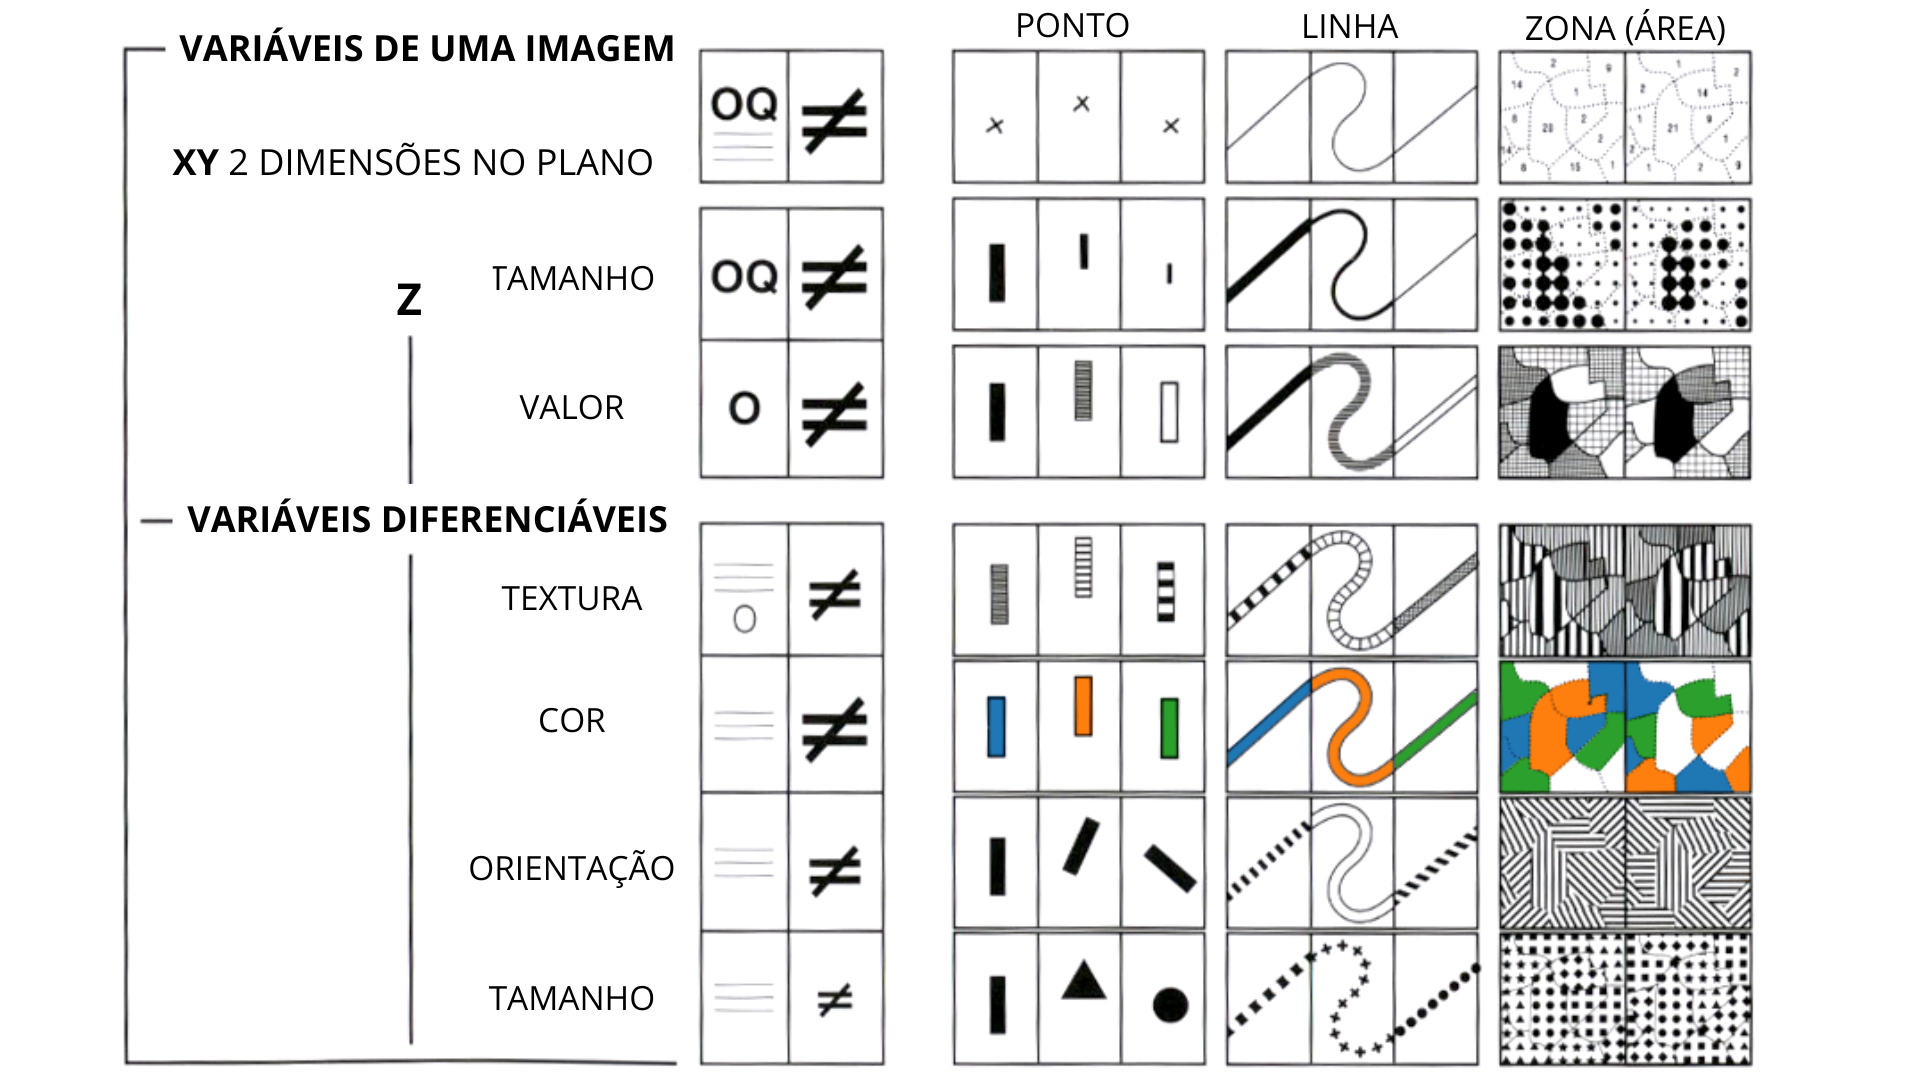

*Taxonomia de codificação visual de Bertin, do livro [Sémiologie Graphique](https://books.google.com.br/books/about/Semiology_of_Graphics.html?id=X5caQwAACAAJ&redir_esc=y)*, adaptado por [Mike Bostock](https://bost.ocks.org/mike/).


*   O estudo sistemático de marcas, codificação visual e tipos de dados de apoio começou com [Jacques Bertin](httpshttps://en.wikipedia.org/wiki/Jacques_Bertin://) em 1967, com seu trabalho pioneiro [Sémiologie Graphique (The Semiology of Graphics)](https:https://books.google.com.br/books/about/Semiology_of_Graphics.html?id=X5caQwAACAAJ&redir_esc=y//). A imagem acima ilustra posição, tamanho, intensidade (brilho), textura, cor (matiz), orientação e canais de forma, junto com recomendações de Bertin para os tipos de dados que eles suportam.
*   A estrutura de tipos de dados, marcas e canais também guia ferramentas de visualização *automatizadas* de visualização gráfica, começando com a [APT de Mackinlay ("A Presentation Tool", uma ferramenta de apresentação)](https://scholar.google.com/scholar?cluster=10191273548472217907) em 1986, e continuando até sistemas mais modernos como [Voyager](https://idl.uw.edu/papers/voyager) e [Draco](https://idl.uw.edu/papers/draco).
*   A identificação de dados nominais, ordinais, intervalares e de proporção data de pelo menos 1987, com o artigo de S. S. Steven [On the theory of scales of measurement](https://scholar.google.com/scholar?cluster=14356809180080326415) (Na teoria de escalas de medição).




